<a href="https://colab.research.google.com/github/vinodk1994/First-Project/blob/main/Supermart_Grocery_Sales_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [ ]:
# import csv file
df = pd.read_csv('D:\Python Project Data set\Supermart Grocery Sales - Retail Analytics Dataset (1).csv', encoding= 'unicode_escape')
# to avoid encoding error use 'unicode escape'

## Exploratory Data Analysis

In [ ]:
# to check how many column or row present in dataset
df.shape

(9994, 11)

In [ ]:
# to check the dataset
df.head(5)

,ï»¿Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Order ID    9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
#check for null values
pd.isnull(df).sum()

ï»¿Order ID      0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [ ]:
#drop unrelated/blank columns
df.dropna(inplace=True)

In [ ]:
# Rename column 'old_column_name' to 'new_column_name'
df = df.rename(columns={'ï»¿Order ID': 'Order ID'})

In [ ]:
## Displaying Column Names
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00
Discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35
Profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95


#### Feature Engineering

In [ ]:
## Convert 'Date' into Date-time Type
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df)

     Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

     Order Date Region  Sal

In [ ]:
# Extract the year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
print(df)

     Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

     Order Date Region  Sal

## Data Analysis

In [ ]:
## Total Sales and profit by Region
Region_sales_profit = df.groupby('Region')[['Sales','Profit']].sum()
print(Region_sales_profit)

           Sales      Profit
Region                      
Central  3468156   856806.84
East     4248368  1074345.58
North       1254      401.28
South    2440461   623562.89
West     4798743  1192004.61


In [ ]:
## Total Sales and profit by Category
Category_sales_profit = df.groupby('Category')[['Sales','Profit']].sum()
print(Category_sales_profit)

                     Sales     Profit
Category                             
Bakery             2112281  528521.06
Beverages          2085313  525605.76
Eggs, Meat & Fish  2267401  567357.22
Food Grains        2115272  529162.64
Fruits & Veggies   2100727  530400.38
Oil & Masala       2038442  497895.29
Snacks             2237546  568178.85


In [ ]:
## Total Sales and profit by Sub-Category
Sub_Category_sales_profit = df.groupby('Sub Category')[['Sales','Profit']].sum()
print(Sub_Category_sales_profit)

                      Sales     Profit
Sub Category                          
Atta & Flour         534649  127861.10
Biscuits             684083  169357.62
Breads & Buns        742586  190764.98
Cakes                685612  168398.46
Chicken              520497  124049.89
Chocolates           733898  183849.34
Cookies              768213  190643.70
Dals & Pulses        523371  130232.29
Edible Oil & Ghee    668086  168593.58
Eggs                 575156  144669.92
Fish                 560548  147248.01
Fresh Fruits         551212  134668.35
Fresh Vegetables     525842  131273.33
Health Drinks       1051439  267469.79
Masalas              697480  168999.11
Mutton               611200  151389.40
Noodles              735435  193685.81
Organic Fruits       503402  130862.33
Organic Staples      558929  144136.89
Organic Vegetables   520271  133596.37
Rice                 498323  126932.36
Soft Drinks         1033874  258135.97
Spices               672876  160302.60


In [ ]:
## Sales Over Time (Year-wise)
# Convert 'Order Date' to datetime and extract the year
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Year'] = df['Order Date'].dt.year

# Group by Year and sum up Sales and Profit
year_sales_profit = df.groupby('Year')[['Sales', 'Profit']].sum()

# Calculate profit percentage as (Profit / Sales) * 100 and round to two decimal places
year_sales_profit['Profit Percentage'] = (year_sales_profit['Profit'] / year_sales_profit['Sales']) * 100
year_sales_profit['Profit Percentage'] = year_sales_profit['Profit Percentage'].round(2)

# Convert the rounded profit percentage to string format with '%' sign
year_sales_profit['Profit Percentage'] = year_sales_profit['Profit Percentage'].astype(str) + '%'

print(year_sales_profit)

        Sales      Profit Profit Percentage
Year                                       
2015  2975599   752529.11            25.29%
2016  3131959   797192.99            25.45%
2017  3871912   953216.22            24.62%
2018  4977512  1244182.88             25.0%


## Visualization

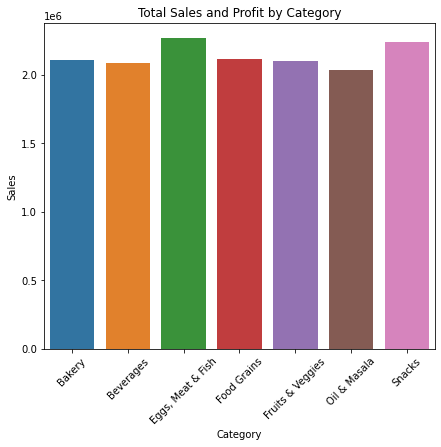

In [ ]:
## Sales and Profit by Category (Bar Plot)
plt.figure(figsize=(7, 6))
sns.barplot(x=Category_sales_profit.index, y='Sales', data=Category_sales_profit.reset_index())
plt.title('Total Sales and Profit by Category')
plt.xticks(rotation=45)
plt.show()

#### Total Revenue by Category

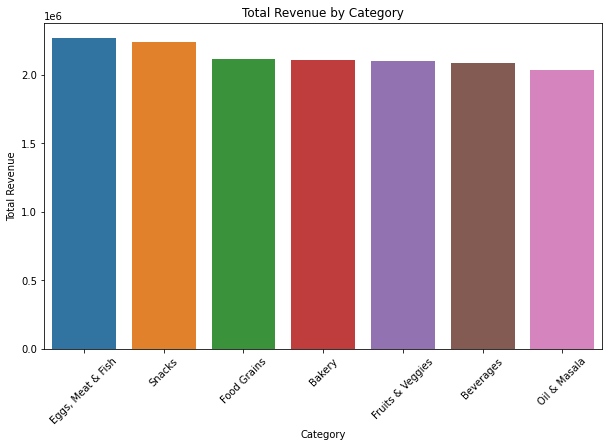

In [ ]:
# Group by product and calculate total revenue
Category_revenue = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=Category_revenue.index, y=Category_revenue.values)
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate product names for better readability
plt.show()

### Top-Selling Products per Region

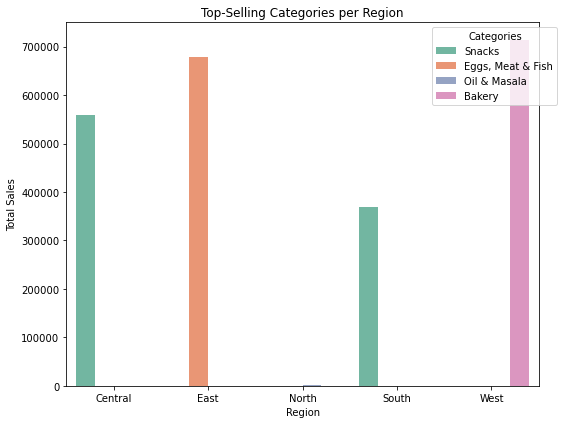

In [ ]:
# Group by region and Category, then calculate total revenue
region_Category_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Find the top-selling product in each region
top_Category_per_region = region_Category_sales.loc[region_Category_sales.groupby('Region')['Sales'].idxmax()]

# Create the bar plot for top-selling products per region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=top_Category_per_region, palette='Set2', dodge=True)
plt.title('Top-Selling Categories per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout(rect=[0,0,0.8,1])
plt.show()